# Interpolation (Mr. P Solver)

Video Link: https://youtu.be/nGwg5MrbZxo

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa3JaS3J3YUtLTW1yTmhYRWhWWFlHaXktVmo2d3xBQ3Jtc0ttTFhZY25tSmtGcTVWSFJhaWVDanRPTFJvY1hNaWl0cDVQQjIyMkNuWW1LTm42MjlpVF84ZG9uYTQ1QzFkMjZXRUJPTEZySlBXTkNiUl83aGFnc1FBLVJ6WjIxUVNFZVFDV1VDengwS0hQVkstSXloSQ&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Finterpolation1.ipynb&v=nGwg5MrbZxo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import interp1d, interp2d
from scipy.integrate import quad, odeint, solve_ivp

**Purpose of interpolation**

Given some $x_{data}=[...]$ and $y_{data}=[...]$ and the goal is to create a function $y=f(x)$ where one can plug in any value of $x$ they want and obtain a corresponding value of $y$.

**Example:**

We want $f(x=1.5)$.

x_data = [ 0.   2.5  5.   7.5 10. ]
y_data [  0.     6.25  25.    56.25 100.  ]
By linear interpolation, f(1.5) = 3.75
By cubic interpolation, f(1.5) = 2.250000000000001


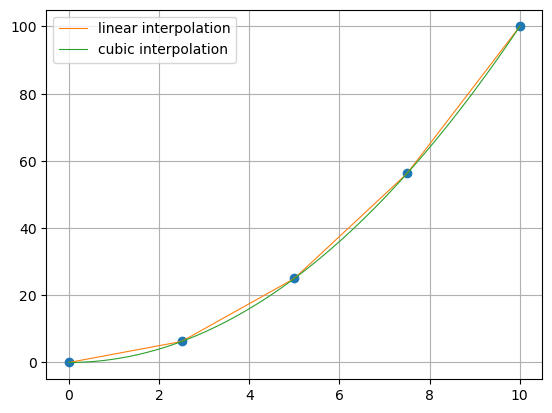

In [2]:
# Given data:
x_data = np.linspace(0,10,5)
y_data = x_data**2
print('x_data =', x_data)
print('y_data', y_data)
plt.plot(x_data, y_data, 'o')

# interpolation
yf1 = interp1d(x_data, y_data, 'linear') # function generated
x1 = np.linspace(0,10,100)
y1 = yf1(x1)
print('By linear interpolation, f(1.5) =', yf1(1.5))
plt.plot(x1,y1, lw=0.8, label='linear interpolation')

yf2 = interp1d(x_data, y_data, 'cubic') # function generated
x2 = np.linspace(0,10,100)
y2 = yf2(x2)
print('By cubic interpolation, f(1.5) =', yf2(1.5))
plt.plot(x2,y2, lw=0.8, label='cubic interpolation')

plt.legend()
plt.grid()
plt.show()

## Uses:
Computing integrals (preferred), Solving Differential Equations (required) and others.

### Computing Integral

**Example:** Given a distribution of energies in a beam of photons, compute the mean energy.

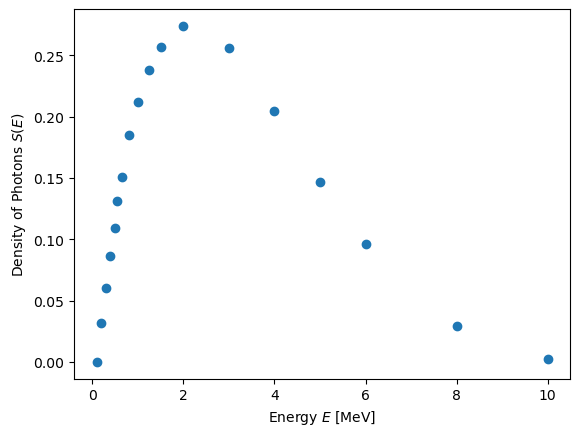

In [3]:
E_data = np.array([ 0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.55 ,  0.662,  0.8  ,
        1.   ,  1.25 ,  1.5  ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        8.   , 10.   ])

S_data = np.array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])

plt.scatter(E_data, S_data)
plt.xlabel('Energy $E$ [MeV]')
plt.ylabel('Density of Photons $S(E)$')
plt.show()

The mean energy is given by, $$ \bar{E} = \frac{\int E S(E) dE}{\int S(E) dE} $$

To evaluate the integral, we need a function `Sf` that takes in an energy and returns a spectrum value.

In [4]:
# function
Sf = interp1d(E_data, S_data, 'cubic')

num = quad(lambda E: E*Sf(E), min(E_data), max(E_data))[0]
den = quad(lambda E: Sf(E), min(E_data), max(E_data))[0]
E_mean = num/den
print('average energy (in MeV) is', E_mean)

average energy (in MeV) is 3.3825472782623396


### Solving Differential Equations

**Example:** The rocket equation is given by,

$$ \frac{dv}{dt} = -a -\frac{b}{m(t)}v^2 - \frac{1}{m(t)}\frac{dm(t)}{dt} $$

Here we need to know about the function $m(t)$.

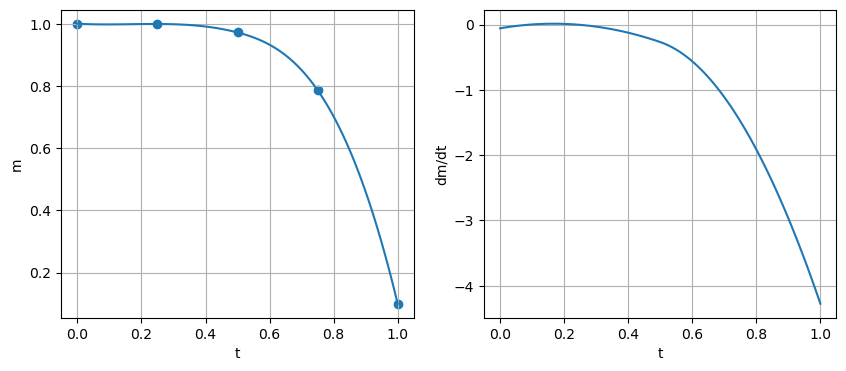

In [5]:
# given data
t_data = np.array([0.  , 0.25, 0.5 , 0.75, 1.  ])
m_data = np.array([1.        , 0.99912109, 0.971875  , 0.78642578, 0.1       ])

# interpolation
mf = interp1d(t_data, m_data, 'cubic') # m(t)
mf(0.1)
# differentiation
dmdtf = mf._spline.derivative(nu=1)   # dm/dt(t)

t = np.linspace(min(t_data),max(t_data),100)
m = mf(t)
dmdt = dmdtf(t)

figure, axes = plt.subplots(1,2, figsize=(10,4))
ax1 = axes[0]
ax1.scatter(t_data, m_data)
ax1.plot(t,m)
ax1.set_xlabel('t')
ax1.set_ylabel('m')
ax1.grid()
ax2 = axes[1]
ax2.plot(t,dmdt)
ax2.set_xlabel('t')
ax2.set_ylabel('dm/dt')
ax2.grid()
plt.show()

We can use the functions `mf` and `dmdtf` in the ODE solver to solve the differential equation of rocket motion.

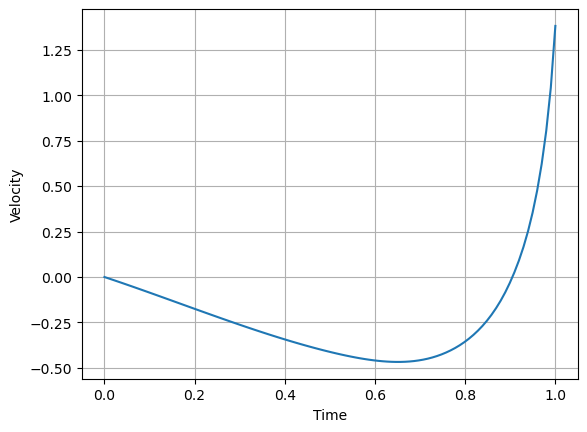

In [6]:
# parameters
a, b = 0.78, 0.1

def dvdt(t,v):
    return -a -b/mf(t) -dmdtf(t)/mf(t)
v0 = 0
t = np.linspace(0,1,100)

sol = solve_ivp(dvdt, [min(t), max(t)], y0=[v0], t_eval=t)
tp, vp = sol.t, sol.y[0]

plt.plot(tp,vp)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.grid()
plt.show()

## 2D Interpolation

We need it when we have a 2D function, say, $z = f(x,y)$. Here, `interp2d` is used.

For all details, go to the link,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d

In [7]:
x_data = np.array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  ,
       0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25,
       0.5 , 0.75, 1.  ])
y_data = np.array([0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 1.  , 1.  ,
       1.  , 1.  , 1.  ])
z_data = np.array([0.    , 0.0625, 0.25  , 0.5625, 1.    , 0.0625, 0.125 , 0.3125,
       0.625 , 1.0625, 0.25  , 0.3125, 0.5   , 0.8125, 1.25  , 0.5625,
       0.625 , 0.8125, 1.125 , 1.5625, 1.    , 1.0625, 1.25  , 1.5625,
       2.    ])

In [8]:
# interpolation
zf = interp2d(x_data, y_data, z_data, 'cubic')
zf(0.12,0.47)

array([0.2353])

*Try the graph after watching the Matplotlib video.*